# Visualization

This is the seventh in a series of notebooks related to astronomy data.

As a continuing example, we will replicate part of the analysis in a recent paper, "[Off the beaten path: Gaia reveals GD-1 stars outside of the main stream](https://arxiv.org/abs/1805.00425)" by Adrian M. Price-Whelan and Ana Bonaca.

In the previous notebook we selected photometry data from Pan-STARRS and used it to identify stars we think are likely to be in GD-1

In this notebook, we'll take the results from previous lessons and use them to make a figure that tells a compelling scientific story.

## Outline

Here are the steps in this notebook:

1. Starting with the figure from the previous notebook, we'll add annotations to present the results more clearly.

2. The we'll see several ways to customize figures to make them more appealing and effective.

3. Finally, we'll see how to make a figure with multiple panels or subplots.

After completing this lesson, you should be able to

* Design a figure that tells a compelling story.

* Use Matplotlib features to customize the appearance of figures.

* Generate a figure with multiple subplots.

## Installing libraries

If you are running this notebook on Colab, you can run the following cell to install Astroquery and the other libraries we'll use.

If you are running this notebook on your own computer, you might have to install these libraries yourself.  See the instructions in the preface.

In [1]:
# If we're running on Colab, install libraries

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery astro-gala wget

## Making Figures That Tell a Story

So far the figure we've made have been "quick and dirty".  Mostly we have used Matplotlib's default style, although we have adjusted a few parameters, like `markersize` and `alpha`, to improve legibility.

Now that the analysis is done, it's time to think more about:

1. Making professional-looking figures that are ready for publication, and

2. Making figures that communicate a scientific result clearly and compellingly.

Not necessarily in that order.

Let's start by reviewing Figure 1 from the original paper.  We've seen the individual panels, but now let's look at the whole thing, along with the caption:

<img width="500" src="https://github.com/datacarpentry/astronomy-python/raw/gh-pages/fig/gd1-5.png">

### Exercise

Think about the following questions:

1. What is the primary scientific result of this work?

2. What story is this figure telling?

3. In the design of this figure, can you identify 1-2 choices the authors made that you think are effective?  Think about big-picture elements, like the number of panels and how they are arranged, as well as details like the choice of typeface.

4. Can you identify 1-2 elements that could be improved, or that you might have done differently?

In [2]:
# Solution

# Some topics that might come up in this discussion:

# 1. The primary result is that the multiple stages of selection 
# make it possible to separate likely candidates from the 
# background more effectively than in previous work, which makes 
# it possible to see the structure of GD-1 in "unprecedented detail".

# 2. The figure documents the selection process as a sequence of 
# steps.  Reading right-to-left, top-to-bottom, we see selection 
# based on proper motion, the results of the first selection, 
# selection based on color and magnitude, and the results of the 
# second selection.  So this figure documents the methodology and 
# presents the primary result.

# 3. It's mostly black and white, with minimal use of color, so 
# it will work well in print.  The annotations in the bottom 
# left panel guide the reader to the most important results.  
# It contains enough technical detail for a professional audience, 
# but most of it is also comprehensible to a more general audience.  
# The two left panels have the same dimensions and their axes are 
# aligned.

# 4. Since the panels represent a sequence, it might be better to 
# arrange them left-to-right.  The placement and size of the axis 
# labels could be tweaked.  The entire figure could be a little 
# bigger to match the width and proportion of the caption.  
# The top left panel has unnused white space (but that leaves 
# space for the annotations in the bottom left).

## Plotting GD-1

Let's start with the panel in the lower left.  The following cell reloads the data.

In [3]:
import os
from wget import download

filename = 'gd1_merged.hdf5'
path = 'https://github.com/AllenDowney/AstronomicalData/raw/main/data/'

if not os.path.exists(filename):
    print(download(path+filename))

In [4]:
import pandas as pd

selected2 = pd.read_hdf(filename, 'selected2')

In [5]:
import matplotlib.pyplot as plt

def plot_second_selection(df):
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.7, alpha=0.9)

    plt.xlabel('$\phi_1$ [deg]')
    plt.ylabel('$\phi_2$ [deg]')
    plt.title('Proper motion + photometry selection', fontsize='medium')

    plt.axis('equal')

And here's what it looks like.

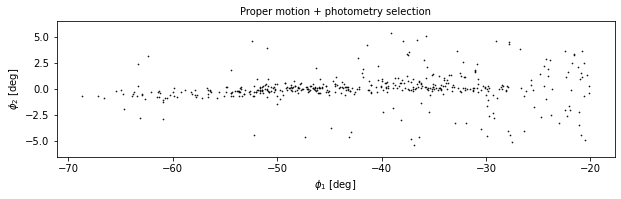

In [6]:
plt.figure(figsize=(10,2.5))
plot_second_selection(selected2)

## Annotations

The figure in the paper uses three other features to present the results more clearly and compellingly:

* A vertical dashed line to distinguish the previously undetected region of GD-1,

* A label that identifies the new region, and

* Several annotations that combine text and arrows to identify features of GD-1.

### Exercise

Choose any or all of these features and add them to the figure:

* To draw vertical lines, see [`plt.vlines`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.vlines.html) and [`plt.axvline`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.axvline.html#matplotlib.pyplot.axvline).

* To add text, see [`plt.text`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.text.html).

* To add an annotation with text and an arrow, see [plt.annotate]().

And here is some [additional information about text and arrows](https://matplotlib.org/3.3.1/tutorials/text/annotations.html#plotting-guide-annotation).

In [7]:
# Solution

# plt.axvline(-55, ls='--', color='gray', 
#             alpha=0.4, dashes=(6,4), lw=2)
# plt.text(-60, 5.5, 'Previously\nundetected', 
#          fontsize='small', ha='right', va='top');

# arrowprops=dict(color='gray', shrink=0.05, width=1.5, 
#                 headwidth=6, headlength=8, alpha=0.4)

# plt.annotate('Spur', xy=(-33, 2), xytext=(-35, 5.5),
#              arrowprops=arrowprops,
#              fontsize='small')

# plt.annotate('Gap', xy=(-22, -1), xytext=(-25, -5.5),
#              arrowprops=arrowprops,
#              fontsize='small')

## Customization

Matplotlib provides a default style that determines things like the colors of lines, the placement of labels and ticks on the axes, and many other properties.

There are several ways to override these defaults and customize your figures:

* To customize only the current figure, you can call functions like `tick_params`, which we'll demonstrate below.

* To customize all figures in a notebook, you use `rcParams`.

* To override more than a few defaults at the same time, you can use a style sheet.

As a simple example, notice that Matplotlib puts ticks on the outside of the figures by default, and only on the left and bottom sides of the axes.

To change this behavior, you can use `gca()` to get the current axes and `tick_params` to change the settings.

Here's how you can put the ticks on the inside of the figure:

```
plt.gca().tick_params(direction='in')
```

### Exercise

Read the documentation of [`tick_params`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html) and use it to put ticks on the top and right sides of the axes.

In [8]:
# Solution

# plt.gca().tick_params(top=True, right=True)

## rcParams

If you want to make a customization that applies to all figures in a notebook, you can use `rcParams`.

Here's an example that reads the current font size from `rcParams`:

In [9]:
plt.rcParams['font.size']

10.0

And sets it to a new value:

In [10]:
plt.rcParams['font.size'] = 14

As an exercise, plot the previous figure again, and see what font sizes have changed.  Look up any other element of `rcParams`, change its value, and check the effect on the figure.

If you find yourself making the same customizations in several notebooks, you can put changes to `rcParams` in a `matplotlibrc` file, [which you can read about here](https://matplotlib.org/3.3.1/tutorials/introductory/customizing.html#customizing-with-matplotlibrc-files).

## Style sheets

The `matplotlibrc` file is read when you import Matplotlib, so it is not easy to switch from one set of options to another.

The solution to this problem is style sheets, [which you can read about here](https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html).

Matplotlib provides a set of predefined style sheets, or you can make your own.

The following cell displays a list of style sheets installed on your system.

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Note that `seaborn-paper`, `seaborn-talk` and `seaborn-poster` are particularly intended to prepare versions of a figure with text sizes and other features that work well in papers, talks, and posters.

To use any of these style sheets, run `plt.style.use` like this:

```
plt.style.use('fivethirtyeight')
```

The style sheet you choose will affect the appearance of all figures you plot after calling `use`, unless you override any of the options or call `use` again.

As an exercise, choose one of the styles on the list and select it by calling `use`.  Then go back and plot one of the figures above and see what effect it has.

If you can't find a style sheet that's exactly what you want, you can make your own.  This repository includes a style sheet called `az-paper-twocol.mplstyle`, with customizations chosen by Azalee Bostroem for publication in astronomy journals.

The following cell downloads the style sheet.

In [12]:
import os
from wget import download

filename = 'az-paper-twocol.mplstyle'
path = 'https://github.com/AllenDowney/AstronomicalData/raw/main/'

if not os.path.exists(filename):
    print(download(path+filename))

You can use it like this:

```
plt.style.use('./az-paper-twocol.mplstyle')
```

The prefix `./` tells Matplotlib to look for the file in the current directory.

As an alternative, you can install a style sheet for your own use by putting it in your configuration directory.  To find out where that is, you can run the following command:

```
import matplotlib as mpl

mpl.get_configdir()
```

## LaTeX fonts

When you include mathematical expressions in titles, labels, and annotations, Matplotlib uses [`mathtext`](https://matplotlib.org/3.1.0/tutorials/text/mathtext.html) to typeset them.  `mathtext` uses the same syntax as LaTeX, but it provides only a subset of its features.

If you need features that are not provided by `mathtext`, or you prefer the way LaTeX typesets mathematical expressions, you can customize Matplotlib to use LaTeX.

In `matplotlibrc` or in a style sheet, you can add the following line:

```
text.usetex        : true
```

Or in a notebook you can run the following code.

```
plt.rcParams['text.usetex'] = True
```

In [13]:
plt.rcParams['text.usetex'] = True

If you go back and draw the figure again, you should see the difference.

If you get an error message like

```
LaTeX Error: File `type1cm.sty' not found.
```

You might have to install a package that contains the fonts LaTeX needs.  On some systems, the packages `texlive-latex-extra` or `cm-super` might be what you need.  [See here for more help with this](https://stackoverflow.com/questions/11354149/python-unable-to-render-tex-in-matplotlib).

In case you are curious, `cm` stands for [Computer Modern](https://en.wikipedia.org/wiki/Computer_Modern), the font LaTeX uses to typeset math.

## Multiple panels

So far we've been working with one figure at a time, but the figure we are replicating contains multiple panels, also known as "subplots".

Confusingly, Matplotlib provides *three* functions for making figures like this: `subplot`, `subplots`, and `subplot2grid`.

* [`subplot`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplot.html) is simple and similar to MATLAB, so if you are familiar with that interface, you might like `subplot`

* [`subplots`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplots.html) is more object-oriented, which some people prefer.

* [`subplot2grid`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplot2grid.html) is most convenient if you want to control the relative sizes of the subplots. 

So we'll use `subplot2grid`.

All of these functions are easier to use if we put the code that generates each panel in a function.

## Upper right

To make the panel in the upper right, we have to reload `centerline_df`.

In [14]:
import os

filename = 'gd1_dataframe.hdf5'
path = 'https://github.com/AllenDowney/AstronomicalData/raw/main/data/'

if not os.path.exists(filename):
    print(download(path+filename))

In [15]:
import pandas as pd

centerline_df = pd.read_hdf(filename, 'centerline_df')

And define the coordinates of the rectangle we selected.

In [16]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

pm1_rect = [pm1_min, pm1_min, pm1_max, pm1_max]
pm2_rect = [pm2_min, pm2_max, pm2_max, pm2_min]

To plot this rectangle, we'll use a feature we have not seen before: `Polygon`, which is provided by Matplotlib.

To create a `Polygon`, we have to put the coordinates in an array with `x` values in the first column and `y` values in the second column. 

In [17]:
import numpy as np

vertices = np.transpose([pm1_rect, pm2_rect])
vertices

array([[-8.9, -2.2],
       [-8.9,  1. ],
       [-6.9,  1. ],
       [-6.9, -2.2]])

The following function takes a `DataFrame` as a parameter, plots the proper motion for each star, and adds a shaded `Polygon` to show the region we selected.

In [18]:
from matplotlib.patches import Polygon

def plot_proper_motion(df):
    pm1 = df['pm_phi1']
    pm2 = df['pm_phi2']

    plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
    
    poly = Polygon(vertices, closed=True, 
                   facecolor='C1', alpha=0.4)
    plt.gca().add_patch(poly)
    
    plt.xlabel('$\mu_{\phi_1} [\mathrm{mas~yr}^{-1}]$')
    plt.ylabel('$\mu_{\phi_2} [\mathrm{mas~yr}^{-1}]$')

    plt.xlim(-12, 8)
    plt.ylim(-10, 10)

Notice that `add_patch` is like `invert_yaxis`; in order to call it, we have to use `gca` to get the current axes.

Here's what the new version of the figure looks like.  We've changed the labels on the axes to be consistent with the paper.

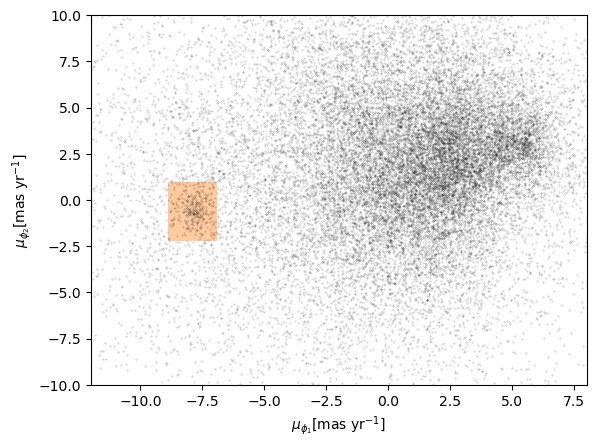

In [19]:
plt.rcParams['text.usetex'] = False
plt.style.use('default')

plot_proper_motion(centerline_df)

## Upper left

Now let's work on the panel in the upper left. We have to reload `candidates`.

In [20]:
import os

filename = 'gd1_candidates.hdf5'
path = 'https://github.com/AllenDowney/AstronomicalData/raw/main/data/'

if not os.path.exists(filename):
    print(download(path+filename))

In [21]:
import pandas as pd

filename = 'gd1_candidates.hdf5'

candidate_df = pd.read_hdf(filename, 'candidate_df')

Here's a function that takes a `DataFrame` of candidate stars and plots their positions in GD-1 coordindates. 

In [22]:
def plot_first_selection(df):
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlabel('$\phi_1$ [deg]')
    plt.ylabel('$\phi_2$ [deg]')
    plt.title('Proper motion selection', fontsize='medium')

    plt.axis('equal')

And here's what it looks like.

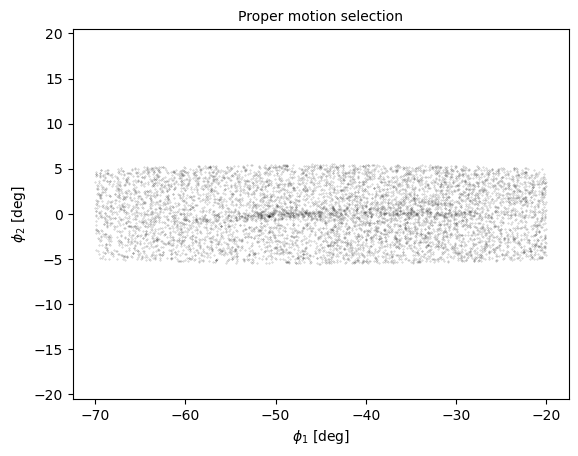

In [23]:
plot_first_selection(candidate_df)

## Lower right

For the figure in the lower right, we need to reload the merged `DataFrame`, which contains data from Gaia and photometry data from Pan-STARRS.

In [24]:
import pandas as pd

filename = 'gd1_merged.hdf5'

merged = pd.read_hdf(filename, 'merged')

From the previous notebook, here's the function that plots the color-magnitude diagram.

In [25]:
import matplotlib.pyplot as plt

def plot_cmd(table):
    """Plot a color magnitude diagram.
    
    table: Table or DataFrame with photometry data
    """
    y = table['g_mean_psf_mag']
    x = table['g_mean_psf_mag'] - table['i_mean_psf_mag']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlim([0, 1.5])
    plt.ylim([14, 22])
    plt.gca().invert_yaxis()

    plt.ylabel('$Magnitude (g)$')
    plt.xlabel('$Color (g-i)$')

And here's what it looks like.

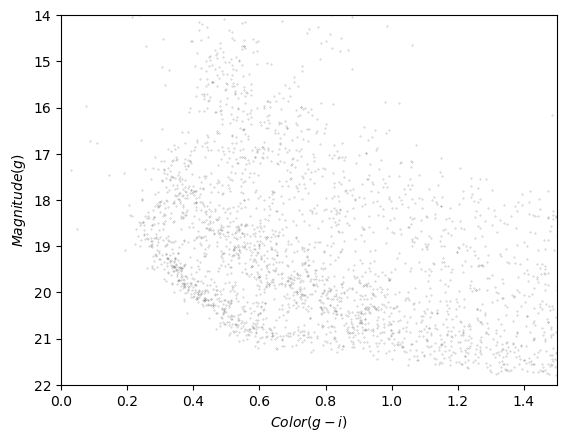

In [26]:
plot_cmd(merged)

The following cell downloads an HDF file that contains the polygon we used to select starts in the color-magnitude diagram, if it doesn't already exist.

In [27]:
import os

filename = 'gd1_polygon.hdf5'
path = 'https://github.com/AllenDowney/AstronomicalData/raw/main/data/'

if not os.path.exists(filename):
    print(download(path+filename))

And here's how we read it back.

In [28]:
loop_df = pd.read_hdf(filename, 'loop_df')
loop_df.head()

,color_loop,mag_loop
0,0.632171,21.411746
1,0.610238,21.322466
2,0.588449,21.233380
3,0.566924,21.144427
4,0.545461,21.054549


### Exercise

Add a few lines to `plot_cmd` to show the polygon we selected as a shaded area.  

Hint: pass `coords` as an argument to `Polygon` and plot it using `add_patch`.

In [29]:
# Solution

# poly = Polygon(loop_df, closed=True, 
#                facecolor='C1', alpha=0.4)
# plt.gca().add_patch(poly)

## Subplots

Now we're ready to put it all together.  To make a figure with four subplots, we'll use `subplot2grid`, [which requires two arguments](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.subplot2grid.html):

* `shape`, which is a tuple with the number of rows and columns in the grid, and

* `loc`, which is a tuple identifying the location in the grid we're about to fill.

In this example, `shape` is `(2, 2)` to create two rows and two columns.

For the first panel, `loc` is `(0, 0)`, which indicates row 0 and column 0, which is the upper-left panel.

Here's how we use it to draw the four panels.

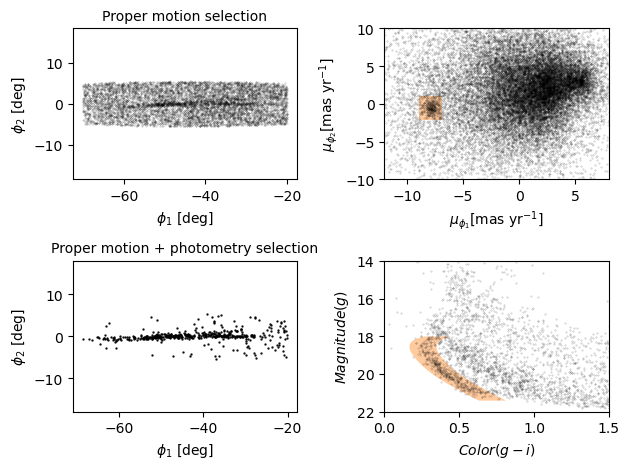

In [30]:
shape = (2, 2)
plt.subplot2grid(shape, (0, 0))
plot_first_selection(candidate_df)

plt.subplot2grid(shape, (0, 1))
plot_proper_motion(centerline_df)

plt.subplot2grid(shape, (1, 0))
plot_second_selection(selected2)

plt.subplot2grid(shape, (1, 1))
plot_cmd(merged)
poly = Polygon(loop_df, closed=True, 
               facecolor='C1', alpha=0.4)
plt.gca().add_patch(poly)

plt.tight_layout()

We use [`plt.tight_layout`](https://matplotlib.org/3.3.1/tutorials/intermediate/tight_layout_guide.html) at the end, which adjusts the sizes of the panels to make sure the titles and axis labels don't overlap.

As an exercise, see what happens if you leave out `tight_layout`.

## Adjusting proportions

In the previous figure, the panels are all the same size.  To get a better view of GD-1, we'd like to stretch the panels on the left and compress the ones on the right.

To do that, we'll use the `colspan` argument to make a panel that spans multiple columns in the grid.

In the following example, `shape` is `(2, 4)`, which means 2 rows and 4 columns.

The panels on the left span three columns, so they are three times wider than the panels on the right.

At the same time, we use `figsize` to adjust the aspect ratio of the whole figure.

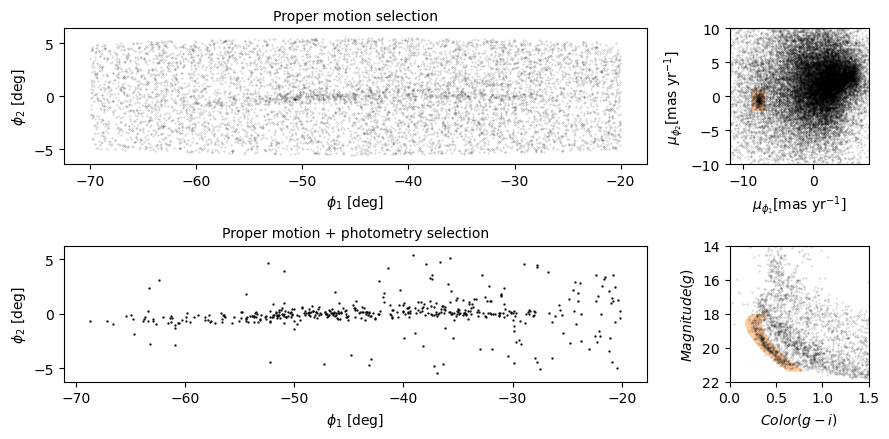

In [31]:
plt.figure(figsize=(9, 4.5))

shape = (2, 4)
plt.subplot2grid(shape, (0, 0), colspan=3)
plot_first_selection(candidate_df)

plt.subplot2grid(shape, (0, 3))
plot_proper_motion(centerline_df)

plt.subplot2grid(shape, (1, 0), colspan=3)
plot_second_selection(selected2)

plt.subplot2grid(shape, (1, 3))
plot_cmd(merged)
poly = Polygon(loop_df, closed=True, 
               facecolor='C1', alpha=0.4)
plt.gca().add_patch(poly)

plt.tight_layout()

This is looking more and more like the figure in the paper.

### Exercise

In this example, the ratio of the widths of the panels is 3:1.  How would you adjust it if you wanted the ratio to be 3:2?

In [32]:
# Solution

# plt.figure(figsize=(9, 4.5))

# shape = (2, 5)                                   # CHANGED
# plt.subplot2grid(shape, (0, 0), colspan=3)
# plot_first_selection(candidate_df)

# plt.subplot2grid(shape, (0, 3), colspan=2)       # CHANGED
# plot_proper_motion(centerline_df)

# plt.subplot2grid(shape, (1, 0), colspan=3)
# plot_second_selection(selected2)

# plt.subplot2grid(shape, (1, 3), colspan=2)       # CHANGED
# plot_cmd(merged)
# poly = Polygon(coords, closed=True, 
#                facecolor='C1', alpha=0.4)
# plt.gca().add_patch(poly)

# plt.tight_layout()

## Summary

In this notebook, we reverse-engineered the figure we've been replicating, identifying elements that seem effective and others that could be improved.

We explored features Matplotlib provides for adding annotations to figures -- including text, lines, arrows, and polygons -- and several ways to customize the appearance of figures.  And we learned how to create figures that contain multiple panels.

## Best practices

* The most effective figures focus on telling a single story clearly and compellingly.

* Consider using annotations to guide the readers attention to the most important elements of a figure.

* The default Matplotlib style generates good quality figures, but there are several ways you can override the defaults.

* If you find yourself making the same customizations on several projects, you might want to create your own style sheet.